## Week 4 Answers

In [1]:
from pyscf import gto, dft, scf, fci
import numpy as np

/depot/awasser/apps/psi4_1.8_pyscf_2.3.0/lib/python3.8/site-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


### Homework
* Why do we need to solve the KS equations self consistently?   
          Because the forces depend on the position and the position depends on the forces

* Effect of the basis set
    * How does changing the size of basis set change our energy (higher/lower?)
           Increasing the size of the basis set will bring the energy closer to the energy at the complete basis set limit, which is lower due to increased flexibility in the basis set
    * How many basis functions does H2O have with STO-3G. How many primitive gaussians?
            STO-3G -> 1 b.f. for each orbital, mixing of 3 Primitive gaussians for each b.f. --> 7 b.f., 21 gaussians
    * What are the dimensions of our Fock matrix?
            with sto-3g, 7x7, Nbf x Nbf.
        * how does changing the basis set affect the Fock matrix
                Larger basis = larger fock matrix as F is KxK
    * does changing the basis set affect convergence?
                Larger basis set may need more iterations due to more flexibility
        * does it affect the speed of each iteration?
                Since the Basis set determines the size of our fock matrix (K^2), which we must diagonalize, as well as the eri tensor(K^4), the speed of each iteration depends greatly on the basis set size
    * What is the limiting factor in the scope of an SCF calculation?
            ultimately the size of the basis set is the limiting factor, which will depend on the basis set chosen and the number of electrons. For GTOs, the limiting factor will oftentimes be the ERI tensor, which scales as K^4, where K is Number of b.f. . For some challenging systems, SCF calculations can be hard to converge due to other reasons as well.

* Effect of the inital guess
    * how does the inital guess for D affect convergence? try different inital guesses and see how they converge
        The initial guess greatly effects the speed of convergence as it determines how far we have to move to find the minimum. Moreover, if the initial guess is exceptionally poor, then we might get stuck and never converge.

* Last week we did Geometry Optimization of the HeH+ dimer, can you do the same geometry optimzation, this time using DFT? What are the differences?


In [2]:
mol = gto.M(atom =f"""
    He 
    H 1 0.8
""", basis = 'sto-3g', spin=0, charge=1, verbose=3, unit='bohr')
#Here we use the sto-3g basis for simplicity

In [3]:
import matplotlib.pyplot as plt
energies_dft=[]
energies_hf=[]
energies_fci=[]
dists=np.linspace(1,2,200)
for r in dists:
    print(r)
    mol = gto.M(atom =f"""
    He 
    H 1 {r}
    """, basis = 'sto-3g', spin=0, charge=1, verbose=0, unit='bohr')
    
    mydft = dft.RKS(mol)
    mydft.xc = 'lda'
    E_dft=mydft.kernel()

    myhf = scf.RHF(mol)
    E_hf=myhf.kernel()
    
    cisolver = fci.FCI(myhf)
    E_fci = cisolver.kernel()[0]
    
    energies_dft.append(E_dft)
    energies_hf.append(E_hf)
    energies_fci.append(E_fci)
    

1.0
1.0050251256281406
1.0100502512562815
1.015075376884422
1.020100502512563
1.0251256281407035
1.0301507537688441
1.035175879396985
1.0402010050251256
1.0452261306532664
1.050251256281407
1.0552763819095476
1.0603015075376885
1.065326633165829
1.07035175879397
1.0753768844221105
1.0804020100502512
1.085427135678392
1.0904522613065326
1.0954773869346734
1.100502512562814
1.1055276381909547
1.1105527638190955
1.1155778894472361
1.120603015075377
1.1256281407035176
1.1306532663316582
1.135678391959799
1.1407035175879396
1.1457286432160805
1.150753768844221
1.1557788944723617
1.1608040201005025
1.1658291457286432
1.170854271356784
1.1758793969849246
1.1809045226130652
1.185929648241206
1.1909547738693467
1.1959798994974875
1.2010050251256281
1.2060301507537687
1.2110552763819096
1.2160804020100502
1.221105527638191
1.2261306532663316
1.2311557788944723
1.236180904522613
1.2412060301507537
1.2462311557788945
1.2512562814070352
1.2562814070351758
1.2613065326633166
1.2663316582914572
1.271

In [4]:
# Convert the lists to numpy arrays for easier manipulation
energies_dft = np.array(energies_dft)
energies_hf = np.array(energies_hf)
energies_fci = np.array(energies_hf)
dists = np.array(dists)

# Find the index of the minimum energy for both DFT and HF
min_index_dft = np.argmin(energies_dft)
min_index_hf = np.argmin(energies_hf)
min_index_fci = np.argmin(energies_fci)

# Find the corresponding bond distances
min_dist_dft = dists[min_index_dft]
min_dist_hf = dists[min_index_hf]
min_dist_fci = dists[min_index_hf]

# Print the results
print(f"Minimum DFT energy at distance: {min_dist_dft:.5f} bohr")
print(f"Minimum HF energy at distance: {min_dist_hf:.5f} bohr")
print(f"Minimum FCI energy at distance: {min_dist_fci:.5f} bohr")


Minimum DFT energy at distance: 1.77889 bohr
Minimum HF energy at distance: 1.75879 bohr
Minimum FCI energy at distance: 1.75879 bohr


In [5]:
import matplotlib.pyplot as plt
energies_dft=[]
energies_hf=[]
energies_fci=[]
dists=np.linspace(1,2,200)
for r in dists:
    print(r)
    mol = gto.M(atom =f"""
    He 
    H 1 {r}
    """, basis = 'cc-pvtz', spin=0, charge=1, verbose=0, unit='bohr')
    
    mydft = dft.RKS(mol)
    mydft.xc = 'lda'
    E_dft=mydft.kernel()

    myhf = scf.RHF(mol)
    E_hf=myhf.kernel()
    
    cisolver = fci.FCI(myhf)
    E_fci = cisolver.kernel()[0]
    
    energies_dft.append(E_dft)
    energies_hf.append(E_hf)
    energies_fci.append(E_fci)
    
# Convert the lists to numpy arrays for easier manipulation
energies_dft = np.array(energies_dft)
energies_hf = np.array(energies_hf)
energies_fci = np.array(energies_hf)
dists = np.array(dists)

# Find the index of the minimum energy for both DFT and HF
min_index_dft = np.argmin(energies_dft)
min_index_hf = np.argmin(energies_hf)
min_index_fci = np.argmin(energies_fci)

# Find the corresponding bond distances
min_dist_dft = dists[min_index_dft]
min_dist_hf = dists[min_index_hf]
min_dist_fci = dists[min_index_hf]

# Print the results
print(f"Minimum DFT energy at distance: {min_dist_dft:.3f} bohr")
print(f"Minimum HF energy at distance: {min_dist_hf:.3f} bohr")
print(f"Minimum FCI energy at distance: {min_dist_fci:.3f} bohr")


1.0
1.0050251256281406
1.0100502512562815
1.015075376884422
1.020100502512563
1.0251256281407035
1.0301507537688441
1.035175879396985
1.0402010050251256
1.0452261306532664
1.050251256281407
1.0552763819095476
1.0603015075376885
1.065326633165829
1.07035175879397
1.0753768844221105
1.0804020100502512
1.085427135678392
1.0904522613065326
1.0954773869346734
1.100502512562814
1.1055276381909547
1.1105527638190955
1.1155778894472361
1.120603015075377
1.1256281407035176
1.1306532663316582
1.135678391959799
1.1407035175879396
1.1457286432160805
1.150753768844221
1.1557788944723617
1.1608040201005025
1.1658291457286432
1.170854271356784
1.1758793969849246
1.1809045226130652
1.185929648241206
1.1909547738693467
1.1959798994974875
1.2010050251256281
1.2060301507537687
1.2110552763819096
1.2160804020100502
1.221105527638191
1.2261306532663316
1.2311557788944723
1.236180904522613
1.2412060301507537
1.2462311557788945
1.2512562814070352
1.2562814070351758
1.2613065326633166
1.2663316582914572
1.271

this is much closer to our experimental value of: 1.458 bohr. we increased our basis set by adding more b.f. and importantly polarizatiom functions, which allow more flexibility. Clearly, the method, as well as the choice of basis, are very important. We could do this calculation with our SCF program as well:

In [15]:
# a bit lazy, but we just run a for loop over some list of distances for the whole program we saw last time
energies_own_dft=[]
dists=np.linspace(1,2,200)
for r in dists:
    print(r)
    mol = gto.M(atom =f"""
    He
    H 1 {r}
    """, basis = 'cc-pvtz', spin=0, charge=1, verbose=0, unit='bohr')
    #Here we use the sto-3g basis for simplicity4

    # Let us do a normal PySCF DFT calculation for reference
    mydft = dft.RKS(mol)
    mydft.xc = 'lda'
    mydft.kernel()
    D_ref = mydft.make_rdm1()

    #Let us define the following integrals using pyscf
    T = mol.intor('int1e_kin') 
    V = mol.intor('int1e_nuc') 
    S = mol.intor('int1e_ovlp')
    I = mol.intor('int2e')

    #our core hamiltonian
    H=T+V

    #we need to construct the matrix that diagonalizes S
    e, U = np.linalg.eigh(S)
    A = U @ np.diag(e**-0.5) @ U.T

    #We are doing a restricted calculation, so each orbital contains 2 electrons
    ndocc= mol.nelectron // 2
    
    
    
    F_p = A.dot(H).dot(A)
    # Diagonalize F_p for eigenvalues & eigenvectors with NumPy
    e, C_p = np.linalg.eigh(F_p)
    # Transform C_p back into AO basis
    C = A.dot(C_p)
    # Grab occupied orbitals
    C_occ = C[:, :ndocc]
    # Build density matrix from occupied orbitals
    D = 2 * np.einsum('pi,qi->pq', C_occ, C_occ, optimize=True)
    
    
    
    # Begin SCF Iterations
    #print('==> Starting SCF Iterations <==\n')
    E_old = 0.0

    #this is for DIIS
    # Trial & Residual Vector Lists
    F_list = []
    DIIS_RESID = []


    # Maximum SCF iterations
    MAXITER = 40
    # Energy convergence criterion
    E_conv = 1.0e-8
    D_conv = 1.0e-6

    for scf_iter in range(1, MAXITER + 1):
        # Build Fock matrix
        #print(D)
        J = np.einsum('pqrs,rs->pq', I, D, optimize=True)
        ni = dft.numint.NumInt()
        n, exc, vxc = ni.nr_rks(mol, mydft.grids, 'lda', D)
        F = H + J + vxc

        H_E = np.sum(D * H)
        J_E = 0.5 * np.sum(D * J)

        # Build DIIS Residual
        diis_r = A.dot(F.dot(D).dot(S) - S.dot(D).dot(F)).dot(A)
        # Append trial & residual vectors to lists
        F_list.append(F)
        DIIS_RESID.append(diis_r)


        SCF_E = H_E + J_E + exc + mol.energy_nuc()
        dE = SCF_E - E_old
        dRMS = np.mean(diis_r**2)**0.5
        #print('SCF Iteration %3d: Energy = %4.16f dE = % 1.5E dRMS = %1.5E' % (scf_iter, SCF_E, dE, dRMS))

        # Check for convergence
        if (abs(dE) < E_conv) and (dRMS < D_conv):
            break
        E_old = SCF_E

        #DIIS procedure
        if scf_iter >= 2:
            # Build B matrix
            B_dim = len(F_list) + 1
            B = np.empty((B_dim, B_dim))
            B[-1, :] = -1
            B[:, -1] = -1
            B[-1, -1] = 0
            for i in range(len(F_list)):
                for j in range(len(F_list)):
                    B[i, j] = np.einsum('ij,ij->', DIIS_RESID[i], DIIS_RESID[j], optimize=True)

            # Build RHS of Pulay equation 
            rhs = np.zeros((B_dim))
            rhs[-1] = -1

            # Solve Pulay equation for c_i's with NumPy
            coeff = np.linalg.solve(B, rhs)

            # Build DIIS Fock matrix
            F = np.zeros_like(F)
            for x in range(coeff.shape[0] - 1):
                F += coeff[x] * F_list[x]



        # Compute new orbital guess
        F_p = A.dot(F).dot(A)
        e, C_p = np.linalg.eigh(F_p)
        C = A.dot(C_p)
        C_occ = C[:, :ndocc]
        D = 2* np.einsum('pi,qi->pq', C_occ, C_occ, optimize=True)

    # Post iterations
    print('\nSCF converged.')
    print(f'Final RHF Energy: {SCF_E:.13f} [Eh]')
    energies_own_dft.append(SCF_E)

1.0

SCF converged.
Final RHF Energy: -2.7052732054561 [Eh]
1.0050251256281406

SCF converged.
Final RHF Energy: -2.7078109450970 [Eh]
1.0100502512562815

SCF converged.
Final RHF Energy: -2.7102908199928 [Eh]
1.015075376884422

SCF converged.
Final RHF Energy: -2.7127140366683 [Eh]
1.020100502512563

SCF converged.
Final RHF Energy: -2.7150817746597 [Eh]
1.0251256281407035

SCF converged.
Final RHF Energy: -2.7173951874979 [Eh]
1.0301507537688441

SCF converged.
Final RHF Energy: -2.7196554035997 [Eh]
1.035175879396985

SCF converged.
Final RHF Energy: -2.7218635270636 [Eh]
1.0402010050251256

SCF converged.
Final RHF Energy: -2.7240206383691 [Eh]
1.0452261306532664

SCF converged.
Final RHF Energy: -2.7261277949850 [Eh]
1.050251256281407

SCF converged.
Final RHF Energy: -2.7281860318937 [Eh]
1.0552763819095476

SCF converged.
Final RHF Energy: -2.7301963620418 [Eh]
1.0603015075376885

SCF converged.
Final RHF Energy: -2.7321597767297 [Eh]
1.065326633165829

SCF converged.
Final RHF 


SCF converged.
Final RHF Energy: -2.7969966963945 [Eh]
1.557788944723618

SCF converged.
Final RHF Energy: -2.7969835465045 [Eh]
1.5628140703517588

SCF converged.
Final RHF Energy: -2.7969643832655 [Eh]
1.5678391959798996

SCF converged.
Final RHF Energy: -2.7969393367305 [Eh]
1.5728643216080402

SCF converged.
Final RHF Energy: -2.7969085344023 [Eh]
1.5778894472361809

SCF converged.
Final RHF Energy: -2.7968721012908 [Eh]
1.5829145728643215

SCF converged.
Final RHF Energy: -2.7968301599685 [Eh]
1.5879396984924623

SCF converged.
Final RHF Energy: -2.7967828306266 [Eh]
1.5929648241206031

SCF converged.
Final RHF Energy: -2.7967302311287 [Eh]
1.5979899497487438

SCF converged.
Final RHF Energy: -2.7966724770651 [Eh]
1.6030150753768844

SCF converged.
Final RHF Energy: -2.7966096818050 [Eh]
1.608040201005025

SCF converged.
Final RHF Energy: -2.7965419565482 [Eh]
1.6130653266331658

SCF converged.
Final RHF Energy: -2.7964694103751 [Eh]
1.6180904522613067

SCF converged.
Final RHF E

In [16]:
dists = np.array(dists)
energies_own_dft = np.array(energies_own_dft)

# Find the index of the minimum energy for both DFT and HF
min_index_own_dft = np.argmin(energies_own_dft)


# Find the corresponding bond distances
min_dist_own_dft = dists[min_index_own_dft]


# Print the results
print(f"Minimum DFT energy at distance: {min_dist_own_dft:.5f} bohr")


Minimum DFT energy at distance: 1.54271 bohr


* Think of a situation where our SCF procedure might fail, Can you set up a calculation that fails to converge? feel free to modify the molecule, geometry, initial guess, and convergence criteria.
        One important situation where SCF might struggle is in "strongly correlated systems":

In [19]:
import matplotlib.pyplot as plt
energies_dft=[]
energies_hf=[]
energies_fci=[]
dists=np.linspace(1,40,50)
for r in dists:
    print(r)
    mol = gto.M(atom =f"""
    H 
    H 1 {r}
    """, basis = 'sto-3g', spin=0, charge=0, verbose=3, unit='bohr')
    
    mydft = dft.RKS(mol)
    mydft.xc = 'lda'
    E_dft=mydft.kernel()

    myhf = scf.RHF(mol)
    E_hf=myhf.kernel()
    
    cisolver = fci.FCI(myhf)
    E_fci = cisolver.kernel()[0]
    
    energies_dft.append(E_dft)
    energies_hf.append(E_hf)
    energies_fci.append(E_fci)
    

1.0
converged SCF energy = -0.964249094967315
converged SCF energy = -1.06599946214331
1.7959183673469388
converged SCF energy = -1.0008623562864
converged SCF energy = -1.07954379213272
2.5918367346938775
converged SCF energy = -0.903762391129911
converged SCF energy = -0.950402287329988
3.387755102040816
converged SCF energy = -0.816868469180667
converged SCF energy = -0.830636854125356
4.183673469387755
converged SCF energy = -0.758053483831927
converged SCF energy = -0.744069191309892
4.979591836734694
converged SCF energy = -0.722883564817472
converged SCF energy = -0.687549225188419
5.775510204081632
converged SCF energy = -0.70342685957544
converged SCF energy = -0.652272494930685
6.571428571428571
converged SCF energy = -0.693535262545452
converged SCF energy = -0.630703990092767
7.36734693877551
converged SCF energy = -0.688946194668986
converged SCF energy = -0.617312903665648
8.16326530612245
converged SCF energy = -0.686974625538819
converged SCF energy = -0.608480428854252

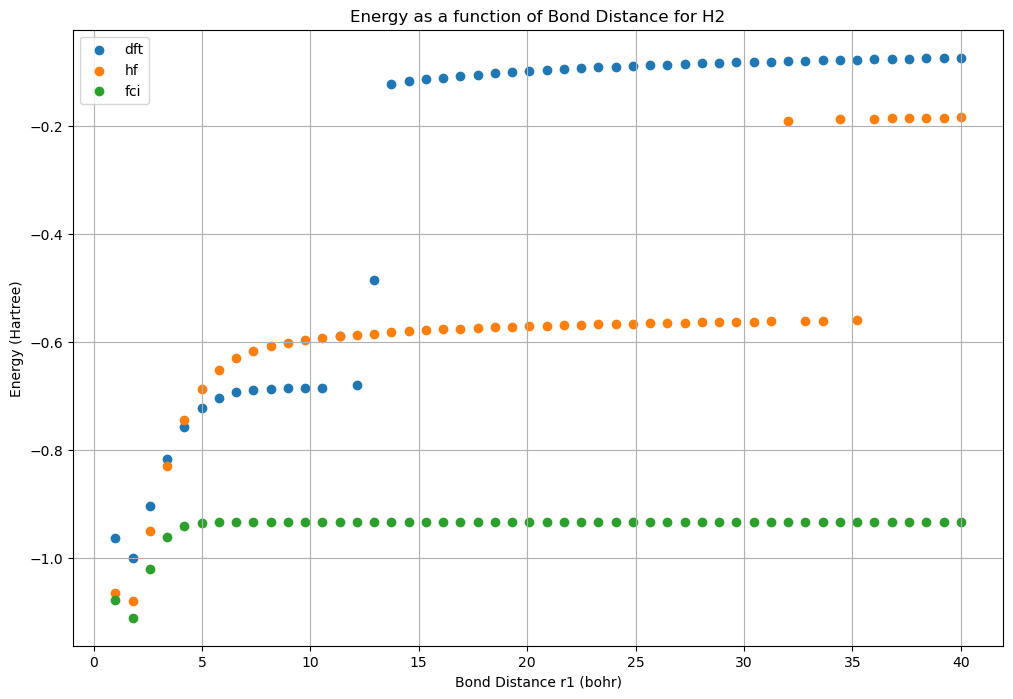

In [21]:
plt.figure(figsize=(12, 8))


plt.scatter(dists, energies_dft, label=f'dft')
plt.scatter(dists, energies_hf, label=f'hf')
plt.scatter(dists, energies_fci, label=f'fci')
plt.xlabel('Bond Distance r1 (bohr)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy as a function of Bond Distance for H2')
plt.legend()
plt.grid()
plt.show()

In [25]:
mol = gto.M(atom =f"""
    H
    H 1 30
""", basis = 'cc-pvtz', spin=0, charge=0, verbose=0, unit='bohr')
#Here we use the sto-3g basis for simplicity4

# Let us do a normal PySCF DFT calculation for reference
mydft = dft.RKS(mol)
mydft.xc = 'lda'
mydft.kernel()
D_ref = mydft.make_rdm1()

#Let us define the following integrals using pyscf
T = mol.intor('int1e_kin') 
V = mol.intor('int1e_nuc') 
S = mol.intor('int1e_ovlp')
I = mol.intor('int2e')

#our core hamiltonian
H=T+V

#we need to construct the matrix that diagonalizes S
e, U = np.linalg.eigh(S)
A = U @ np.diag(e**-0.5) @ U.T

#We are doing a restricted calculation, so each orbital contains 2 electrons
ndocc= mol.nelectron // 2



F_p = A.dot(H).dot(A)
# Diagonalize F_p for eigenvalues & eigenvectors with NumPy
e, C_p = np.linalg.eigh(F_p)
# Transform C_p back into AO basis
C = A.dot(C_p)
# Grab occupied orbitals
C_occ = C[:, :ndocc]
# Build density matrix from occupied orbitals
D = 2 * np.einsum('pi,qi->pq', C_occ, C_occ, optimize=True)



# Begin SCF Iterations
print('==> Starting SCF Iterations <==\n')
E_old = 0.0

#this is for DIIS
# Trial & Residual Vector Lists
F_list = []
DIIS_RESID = []


# Maximum SCF iterations
MAXITER = 100
# Energy convergence criterion
E_conv = 1.0e-8
D_conv = 1.0e-6

for scf_iter in range(1, MAXITER + 1):
    # Build Fock matrix
    #print(D)
    J = np.einsum('pqrs,rs->pq', I, D, optimize=True)
    ni = dft.numint.NumInt()
    n, exc, vxc = ni.nr_rks(mol, mydft.grids, 'lda', D)
    F = H + J + vxc

    H_E = np.sum(D * H)
    J_E = 0.5 * np.sum(D * J)

    # Build DIIS Residual
    diis_r = A.dot(F.dot(D).dot(S) - S.dot(D).dot(F)).dot(A)
    # Append trial & residual vectors to lists
    F_list.append(F)
    DIIS_RESID.append(diis_r)


    SCF_E = H_E + J_E + exc + mol.energy_nuc()
    dE = SCF_E - E_old
    dRMS = np.mean(diis_r**2)**0.5
    print('SCF Iteration %3d: Energy = %4.16f dE = % 1.5E dRMS = %1.5E' % (scf_iter, SCF_E, dE, dRMS))

    # Check for convergence
    if (abs(dE) < E_conv) and (dRMS < D_conv):
        break
    E_old = SCF_E

    #DIIS procedure
    if scf_iter >= 2:
        # Build B matrix
        B_dim = len(F_list) + 1
        B = np.empty((B_dim, B_dim))
        B[-1, :] = -1
        B[:, -1] = -1
        B[-1, -1] = 0
        for i in range(len(F_list)):
            for j in range(len(F_list)):
                B[i, j] = np.einsum('ij,ij->', DIIS_RESID[i], DIIS_RESID[j], optimize=True)

        # Build RHS of Pulay equation 
        rhs = np.zeros((B_dim))
        rhs[-1] = -1

        # Solve Pulay equation for c_i's with NumPy
        coeff = np.linalg.solve(B, rhs)

        # Build DIIS Fock matrix
        F = np.zeros_like(F)
        for x in range(coeff.shape[0] - 1):
            F += coeff[x] * F_list[x]



    # Compute new orbital guess
    F_p = A.dot(F).dot(A)
    e, C_p = np.linalg.eigh(F_p)
    C = A.dot(C_p)
    C_occ = C[:, :ndocc]
    D = 2* np.einsum('pi,qi->pq', C_occ, C_occ, optimize=True)

# Post iterations
print('\nSCF converged.')
print(f'Final RHF Energy: {SCF_E:.13f} [Eh]')

==> Starting SCF Iterations <==

SCF Iteration   1: Energy = -0.3189171855859950 dE = -3.18917E-01 dRMS = 2.13590E-02
SCF Iteration   2: Energy = -0.3189078756057326 dE =  9.30998E-06 dRMS = 2.13599E-02
SCF Iteration   3: Energy = -0.4290444107344298 dE = -1.10137E-01 dRMS = 5.16289E-03
SCF Iteration   4: Energy = -0.3262892609880786 dE =  1.02755E-01 dRMS = 2.06277E-02
SCF Iteration   5: Energy = -0.3398945054027526 dE = -1.36052E-02 dRMS = 1.93253E-02
SCF Iteration   6: Energy = -0.3572127215173788 dE = -1.73182E-02 dRMS = 1.75436E-02
SCF Iteration   7: Energy = -0.3842242014633952 dE = -2.70115E-02 dRMS = 1.42127E-02
SCF Iteration   8: Energy = -0.4017744659480507 dE = -1.75503E-02 dRMS = 1.15082E-02
SCF Iteration   9: Energy = -0.3231951677776189 dE =  7.85793E-02 dRMS = 2.09719E-02
SCF Iteration  10: Energy = -0.3250148361562495 dE = -1.81967E-03 dRMS = 2.08098E-02
SCF Iteration  11: Energy = -0.3190904782655327 dE =  5.92436E-03 dRMS = 2.13433E-02
SCF Iteration  12: Energy = -0.3

SCF Iteration  98: Energy = -0.3177978085074830 dE = -1.99060E-04 dRMS = 2.14608E-02
SCF Iteration  99: Energy = -0.2572732690927925 dE =  6.05245E-02 dRMS = 2.64515E-02
SCF Iteration 100: Energy = 2.8719789482285658 dE =  3.12925E+00 dRMS = 1.27555E-01

SCF converged.
Final RHF Energy: 2.8719789482286 [Eh]


* can you extract the molecular orbital energies? 
    * What does the number of molecular orbitals depend on?
            The number of basis functions
        * How many molecular orbitals do we have for H2O with STO-3G?
                7
            * How many are negative in energy? 
                    5 (the occupied orbitals)
        * How many molecular orbitals do we have for H2O with aug-cc-pvdz? 
                41
            * How many are negative in energy? 
                    5 ( still the occupied orbitals)

In [49]:
mol = gto.M(atom =f"""
    O 1 
    H 1 0.74
    H 1 0.74 2 104
""", basis = 'aug-cc-pvdz', spin=0, charge=0, verbose=3)

# Let us do a normal PySCF DFT calculation for reference
mydft = dft.RKS(mol)
mydft.xc = 'lda'
mydft.kernel()
D_ref = mydft.make_rdm1()

#Let us define the following integrals using pyscf
T = mol.intor('int1e_kin') 
V = mol.intor('int1e_nuc') 
S = mol.intor('int1e_ovlp')
I = mol.intor('int2e')

#our core hamiltonian
H=T+V

#we need to construct the matrix that diagonalizes S
e, U = np.linalg.eigh(S)
A = U @ np.diag(e**-0.5) @ U.T

#We are doing a restricted calculation, so each orbital contains 2 electrons
ndocc= mol.nelectron // 2



F_p = A.dot(H).dot(A)
# Diagonalize F_p for eigenvalues & eigenvectors with NumPy
e, C_p = np.linalg.eigh(F_p)
# Transform C_p back into AO basis
C = A.dot(C_p)
# Grab occupied orbitals
C_occ = C[:, :ndocc]
# Build density matrix from occupied orbitals
D = 2 * np.einsum('pi,qi->pq', C_occ, C_occ, optimize=True)



# Begin SCF Iterations
print('==> Starting SCF Iterations <==\n')
E_old = 0.0

#this is for DIIS
# Trial & Residual Vector Lists
F_list = []
DIIS_RESID = []


# Maximum SCF iterations
MAXITER = 40
# Energy convergence criterion
E_conv = 1.0e-8
D_conv = 1.0e-6

for scf_iter in range(1, MAXITER + 1):
    # Build Fock matrix
    #print(D)
    J = np.einsum('pqrs,rs->pq', I, D, optimize=True)
    ni = dft.numint.NumInt()
    n, exc, vxc = ni.nr_rks(mol, mydft.grids, 'lda', D)
    F = H + J + vxc

    H_E = np.sum(D * H)
    J_E = 0.5 * np.sum(D * J)

    # Build DIIS Residual
    diis_r = A.dot(F.dot(D).dot(S) - S.dot(D).dot(F)).dot(A)
    # Append trial & residual vectors to lists
    F_list.append(F)
    DIIS_RESID.append(diis_r)


    SCF_E = H_E + J_E + exc + mol.energy_nuc()
    dE = SCF_E - E_old
    dRMS = np.mean(diis_r**2)**0.5
    print('SCF Iteration %3d: Energy = %4.16f dE = % 1.5E dRMS = %1.5E' % (scf_iter, SCF_E, dE, dRMS))

    # Check for convergence
    if (abs(dE) < E_conv) and (dRMS < D_conv):
        break
    E_old = SCF_E

    #DIIS procedure
    if scf_iter >= 2:
        # Build B matrix
        B_dim = len(F_list) + 1
        B = np.empty((B_dim, B_dim))
        B[-1, :] = -1
        B[:, -1] = -1
        B[-1, -1] = 0
        for i in range(len(F_list)):
            for j in range(len(F_list)):
                B[i, j] = np.einsum('ij,ij->', DIIS_RESID[i], DIIS_RESID[j], optimize=True)

        # Build RHS of Pulay equation 
        rhs = np.zeros((B_dim))
        rhs[-1] = -1

        # Solve Pulay equation for c_i's with NumPy
        coeff = np.linalg.solve(B, rhs)

        # Build DIIS Fock matrix
        F = np.zeros_like(F)
        for x in range(coeff.shape[0] - 1):
            F += coeff[x] * F_list[x]



    # Compute new orbital guess
    F_p = A.dot(F).dot(A)
    e, C_p = np.linalg.eigh(F_p)
    C = A.dot(C_p)
    C_occ = C[:, :ndocc]
    D = 2* np.einsum('pi,qi->pq', C_occ, C_occ, optimize=True)

# Post iterations
print('\nSCF converged.')
print(f'Final RHF Energy: {SCF_E:.13f} [Eh]')

converged SCF energy = -75.0280795799437
==> Starting SCF Iterations <==

SCF Iteration   1: Energy = -67.1352445806595171 dE = -6.71352E+01 dRMS = 2.00226E-01
SCF Iteration   2: Energy = -63.2790047587307640 dE =  3.85624E+00 dRMS = 1.46316E-01
SCF Iteration   3: Energy = -73.9570327721484517 dE = -1.06780E+01 dRMS = 8.21047E-02
SCF Iteration   4: Energy = -74.8283482638180715 dE = -8.71315E-01 dRMS = 3.57894E-02
SCF Iteration   5: Energy = -75.0267987964677019 dE = -1.98451E-01 dRMS = 2.98440E-03
SCF Iteration   6: Energy = -75.0279260319221208 dE = -1.12724E-03 dRMS = 9.97970E-04
SCF Iteration   7: Energy = -75.0280781803387384 dE = -1.52148E-04 dRMS = 9.94106E-05
SCF Iteration   8: Energy = -75.0280795337776709 dE = -1.35344E-06 dRMS = 1.77264E-05
SCF Iteration   9: Energy = -75.0280795798597353 dE = -4.60821E-08 dRMS = 6.41934E-07
SCF Iteration  10: Energy = -75.0280795799438351 dE = -8.40998E-11 dRMS = 2.49845E-08

SCF converged.
Final RHF Energy: -75.0280795799438 [Eh]


In [51]:
e

array([-1.85151704e+01, -9.93699547e-01, -5.25594640e-01, -3.14809282e-01,
       -2.44554338e-01,  1.95380249e-04,  4.05531296e-02,  1.13562340e-01,
        1.27244681e-01,  1.58618258e-01,  1.73668444e-01,  2.47681363e-01,
        2.73566302e-01,  3.07198100e-01,  3.35429065e-01,  3.61263211e-01,
        4.85980681e-01,  5.36503393e-01,  5.52666625e-01,  7.60820425e-01,
        8.16135504e-01,  8.65271550e-01,  9.02780165e-01,  9.71090675e-01,
        1.12970788e+00,  1.22894746e+00,  1.28480798e+00,  1.45349566e+00,
        1.88497141e+00,  1.88711896e+00,  2.01249817e+00,  2.12271215e+00,
        2.29836299e+00,  2.50438073e+00,  2.70445058e+00,  2.96880818e+00,
        3.26361064e+00,  3.35080191e+00,  3.40154214e+00,  4.02158395e+00,
        4.37137276e+00])

In [37]:
mydft.mo_energy

array([-1.85151707e+01, -9.93699361e-01, -5.25594512e-01, -3.14809098e-01,
       -2.44554134e-01,  1.95556184e-04,  4.05532181e-02,  1.13562531e-01,
        1.27244910e-01,  1.58618420e-01,  1.73668583e-01,  2.47681602e-01,
        2.73566540e-01,  3.07198376e-01,  3.35429318e-01,  3.61263490e-01,
        4.85980882e-01,  5.36503591e-01,  5.52666822e-01,  7.60820613e-01,
        8.16135701e-01,  8.65271755e-01,  9.02780356e-01,  9.71090867e-01,
        1.12970808e+00,  1.22894765e+00,  1.28480814e+00,  1.45349587e+00,
        1.88497163e+00,  1.88711915e+00,  2.01249838e+00,  2.12271236e+00,
        2.29836320e+00,  2.50438092e+00,  2.70445076e+00,  2.96880839e+00,
        3.26361090e+00,  3.35080211e+00,  3.40154236e+00,  4.02158412e+00,
        4.37137291e+00])

* Can you Create a Z-matrix for H3O+?


In [42]:
r1 = 0.74
mol = gto.M(atom=f"""
    O
    H 1 {r1}
    H 1 {r1} 2 120
    H 1 {r1} 2 120 3 180
""", basis='aug-cc-pvtz', spin=0, charge=1, verbose=3)

* can you run an H3O+ calculation?

In [43]:
mydft = dft.RKS(mol)
mydft.xc = 'lda'
mydft.kernel()
D_ref = mydft.make_rdm1()

converged SCF energy = -75.2081235041074


In [46]:
from pyscf import tools
tools.cubegen.density(mol, 'H3O_plus.cube', D_ref)

array([[[3.27577687e-07, 3.78002637e-07, 4.34964700e-07, ...,
         4.34964700e-07, 3.78002637e-07, 3.27577687e-07],
        [3.46217613e-07, 3.99594462e-07, 4.59978337e-07, ...,
         4.59978337e-07, 3.99594462e-07, 3.46217613e-07],
        [3.65066369e-07, 4.21465694e-07, 4.85370156e-07, ...,
         4.85370156e-07, 4.21465694e-07, 3.65066369e-07],
        ...,
        [3.65066369e-07, 4.21465694e-07, 4.85370156e-07, ...,
         4.85370156e-07, 4.21465694e-07, 3.65066369e-07],
        [3.46217613e-07, 3.99594462e-07, 4.59978337e-07, ...,
         4.59978337e-07, 3.99594462e-07, 3.46217613e-07],
        [3.27577687e-07, 3.78002637e-07, 4.34964700e-07, ...,
         4.34964700e-07, 3.78002637e-07, 3.27577687e-07]],

       [[3.72422439e-07, 4.30189152e-07, 4.95653070e-07, ...,
         4.95653070e-07, 4.30189152e-07, 3.72422439e-07],
        [3.93651263e-07, 4.54866041e-07, 5.24355758e-07, ...,
         5.24355758e-07, 4.54866041e-07, 3.93651263e-07],
        [4.15147628e-07, 

In [47]:
r1=0.74
mol = gto.M(atom=f"""
    O
    H 1 {r1}
    H 1 {r1} 2 120
    H 1 {r1} 2 120 3 180
""", basis='aug-cc-pvtz', spin=0, charge=1, verbose=3)

# Let us do a normal PySCF DFT calculation for reference
mydft = dft.RKS(mol)
mydft.xc = 'lda'
mydft.kernel()
D_ref = mydft.make_rdm1()

#Let us define the following integrals using pyscf
T = mol.intor('int1e_kin') 
V = mol.intor('int1e_nuc') 
S = mol.intor('int1e_ovlp')
I = mol.intor('int2e')

#our core hamiltonian
H=T+V

#we need to construct the matrix that diagonalizes S
e, U = np.linalg.eigh(S)
A = U @ np.diag(e**-0.5) @ U.T

#We are doing a restricted calculation, so each orbital contains 2 electrons
ndocc= mol.nelectron // 2



F_p = A.dot(H).dot(A)
# Diagonalize F_p for eigenvalues & eigenvectors with NumPy
e, C_p = np.linalg.eigh(F_p)
# Transform C_p back into AO basis
C = A.dot(C_p)
# Grab occupied orbitals
C_occ = C[:, :ndocc]
# Build density matrix from occupied orbitals
D = 2 * np.einsum('pi,qi->pq', C_occ, C_occ, optimize=True)



# Begin SCF Iterations
print('==> Starting SCF Iterations <==\n')
E_old = 0.0

#this is for DIIS
# Trial & Residual Vector Lists
F_list = []
DIIS_RESID = []


# Maximum SCF iterations
MAXITER = 40
# Energy convergence criterion
E_conv = 1.0e-8
D_conv = 1.0e-6

for scf_iter in range(1, MAXITER + 1):
    # Build Fock matrix
    #print(D)
    J = np.einsum('pqrs,rs->pq', I, D, optimize=True)
    ni = dft.numint.NumInt()
    n, exc, vxc = ni.nr_rks(mol, mydft.grids, 'lda', D)
    F = H + J + vxc

    H_E = np.sum(D * H)
    J_E = 0.5 * np.sum(D * J)

    # Build DIIS Residual
    diis_r = A.dot(F.dot(D).dot(S) - S.dot(D).dot(F)).dot(A)
    # Append trial & residual vectors to lists
    F_list.append(F)
    DIIS_RESID.append(diis_r)


    SCF_E = H_E + J_E + exc + mol.energy_nuc()
    dE = SCF_E - E_old
    dRMS = np.mean(diis_r**2)**0.5
    print('SCF Iteration %3d: Energy = %4.16f dE = % 1.5E dRMS = %1.5E' % (scf_iter, SCF_E, dE, dRMS))

    # Check for convergence
    if (abs(dE) < E_conv) and (dRMS < D_conv):
        break
    E_old = SCF_E

    #DIIS procedure
    if scf_iter >= 2:
        # Build B matrix
        B_dim = len(F_list) + 1
        B = np.empty((B_dim, B_dim))
        B[-1, :] = -1
        B[:, -1] = -1
        B[-1, -1] = 0
        for i in range(len(F_list)):
            for j in range(len(F_list)):
                B[i, j] = np.einsum('ij,ij->', DIIS_RESID[i], DIIS_RESID[j], optimize=True)

        # Build RHS of Pulay equation 
        rhs = np.zeros((B_dim))
        rhs[-1] = -1

        # Solve Pulay equation for c_i's with NumPy
        coeff = np.linalg.solve(B, rhs)

        # Build DIIS Fock matrix
        F = np.zeros_like(F)
        for x in range(coeff.shape[0] - 1):
            F += coeff[x] * F_list[x]



    # Compute new orbital guess
    F_p = A.dot(F).dot(A)
    e, C_p = np.linalg.eigh(F_p)
    C = A.dot(C_p)
    C_occ = C[:, :ndocc]
    D = 2* np.einsum('pi,qi->pq', C_occ, C_occ, optimize=True)

# Post iterations
print('\nSCF converged.')
print(f'Final RHF Energy: {SCF_E:.13f} [Eh]')

converged SCF energy = -75.2081235041074
==> Starting SCF Iterations <==

SCF Iteration   1: Energy = -61.2033344722078994 dE = -6.12033E+01 dRMS = 1.48958E-01
SCF Iteration   2: Energy = -64.6478409537899807 dE = -3.44451E+00 dRMS = 6.50234E-02
SCF Iteration   3: Energy = -73.3553781668436500 dE = -8.70754E+00 dRMS = 4.62028E-02
SCF Iteration   4: Energy = -75.1068275387976598 dE = -1.75145E+00 dRMS = 9.74509E-03
SCF Iteration   5: Energy = -75.2060484361693256 dE = -9.92209E-02 dRMS = 1.44196E-03
SCF Iteration   6: Energy = -75.2081216977963862 dE = -2.07326E-03 dRMS = 4.01817E-05
SCF Iteration   7: Energy = -75.2081234792132278 dE = -1.78142E-06 dRMS = 5.43455E-06
SCF Iteration   8: Energy = -75.2081235036594364 dE = -2.44462E-08 dRMS = 7.03080E-07
SCF Iteration   9: Energy = -75.2081235041089968 dE = -4.49560E-10 dRMS = 1.41547E-08

SCF converged.
Final RHF Energy: -75.2081235041090 [Eh]
